# 1. Import the spam dataset and print the first six rows.  

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib as plt
%matplotlib inline
from scipy import stats

In [5]:
os.chdir('/Users/apple/Downloads/')

df= pd.read_csv('spam_dataset.csv')
df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


# 2.The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

word_freq_free: Sometimes people are more likely to be attracted to any free things. But this can be a spam and people may be deceived into wasting money. So "free" can be predictor.
word_freq_credit:Combined with their own experience, there are many spam applications for credit cards.
word_freq_address: If emails say that your address should be provided, or mention any address requirement, it can be a spam. So it can be another predictor.

# 3. Visualize the univariate distribution of each of the variables in the previous question.

<AxesSubplot:>

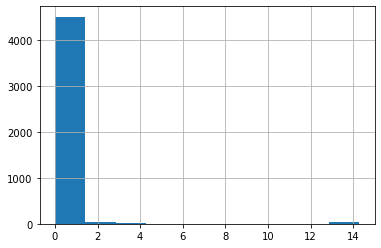

In [6]:
df['word_freq_address:'].hist()

<AxesSubplot:>

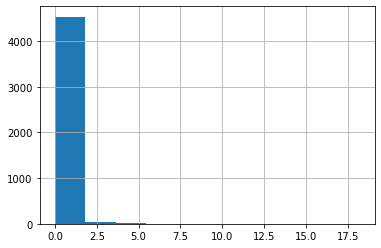

In [7]:
df['word_freq_credit:'].hist()

<AxesSubplot:>

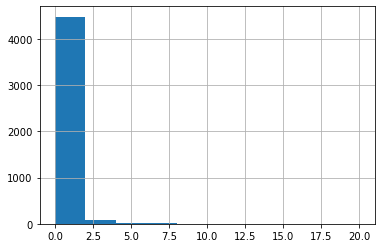

In [8]:
df['word_freq_free:'].hist()

# 4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".


Model: K Nearest Neighbors(KNN), logistic regression, penalized logistic regression, Support Vector Machines(SVM), decision tree, bagged trees, random forests

# 5. Describe the importance of training and test data.  Why do we separate data into these subsets?

The importance of training data: in machine learning, "Training data is the main and most important data to help machine learn and make predictions. This training data set is used to develop algorithms and about 75% of the total data used in the project. Training algorithms are very important on training data sets that are separate and different from the test set, because we need to know the data set (model) Accuracy. Not using training data may lead to poor generalization ability. The reason for dividing the data into training data set and test data set is that we want to generate a training model, which can be used for new unknown data set (model) to predict the results.

# 6. What is k-fold cross validation and what do we use it for?


K-fold cross validation is a resampling technique. "This is to randomly divide the samples into k sets of approximately equal size. Fit the model with all samples except the first subset (called the first fold)." The model is used to predict the retained samples and evaluate the performance indicators. The first subset is returned to the training set, the process repeats, the second subset remains unchanged, and so on. "From textbook * application prediction modeling. What is the purpose of our use of it:" summarize the K resampling estimates of performance (usually with mean and standard error) and use them to understand the relationship between tuning parameters and model practicability. We use k-folding cross validation as a program to estimate the skills of the model on new data. "

# 7. How is k-fold cross validation different from stratified k-fold cross validation?

Stratification is the process of rearranging data to ensure that each fold is a good representation of the whole. Layered folding is a variant of kfold. Hierarchical folding shuffles the data, and then splits the data into n_ Split part. Before splitting, it shuffles the data only and always once. Layering ensures that the relative class frequency ch fold in EA reflects the relative class frequency on the whole data set. Multiple use of stratified k-folding and random time can reduce the variance. Generally speaking, k-fold CV divides the data set into k folds, and hierarchical k-fold ensures that each fold of the data set has the same proportion of observations and has a given label. "

# 8. Choose one model from question four. Split the data into training and test subsets. Build a model with the three variables in the dataset that you think will be good predictors of "spam". Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.

In [9]:
df1 = df['word_freq_credit:']
df2 = df['word_freq_address:']
df3 = df['word_freq_free:']
df4 = df['spam']

predictors = pd.DataFrame(
    {'word_freq_credit:': df1,
     'word_freq_address:': df2,
     'word_freq_free:': df3,
     'spam:':df4
    })
predictors.head()

,word_freq_credit:,word_freq_address:,word_freq_free:,spam:
0,0.00,0.64,0.32,1
1,0.00,0.28,0.14,1
2,0.32,0.00,0.06,1
3,0.00,0.00,0.31,1
4,0.00,0.00,0.31,1


### The model I choose for this question: KNN model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [11]:
# Split the data into training and test subsets

y = predictors['spam:']
X = predictors.loc[:, predictors.columns != 'spam:']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
X.head()

,word_freq_credit:,word_freq_address:,word_freq_free:
0,0.00,0.64,0.32
1,0.00,0.28,0.14
2,0.32,0.00,0.06
3,0.00,0.00,0.31
4,0.00,0.00,0.31


In [12]:
# build a model with three variables (unscaled data)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("KNN for Classification (UNSCALED DATA)")
print("Training set score: {:.3f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))
print("Mean Cross-Validation, Kfold: {:.3f}".format(np.mean(cross_val_score(knn, X_train, y_train))))

knn_unscaled = np.mean(cross_val_score(knn, X_train, y_train))

KNN for Classification (UNSCALED DATA)
Training set score: 0.819
Test set score: 0.789
Mean Cross-Validation, Kfold: 0.794


In [13]:
# Preprocessing data using StandardScalar
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Find score using scaled data
knn = KNeighborsClassifier().fit(X_train_scaled, y_train)

print("KNN for Classification(SCALED DATA)")
print("Training set score: {:.3f}".format(knn.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test_scaled, y_test)))
print("Mean Cross-Validation, Kfold: {:.3f}".format(np.mean(cross_val_score(knn, X_train_scaled, y_train))))

knn_scaled = np.mean(cross_val_score(knn, X_train_scaled, y_train))

KNN for Classification(SCALED DATA)
Training set score: 0.819
Test set score: 0.789
Mean Cross-Validation, Kfold: 0.714


In [15]:
#Tune parameters of the knn model and find a particular parameter

knn_param_grid = {'n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid).fit(X_train_scaled, y_train)

print("KNN for classification (SCALED DATA)")
print("Best Parameter: {}".format(knn_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(knn_grid.best_score_))
print("Test set Score: {:.3f}".format(knn_grid.score(X_test_scaled, y_test)))

KNN for classification (SCALED DATA)
Best Parameter: {'n_neighbors': 4}
Best Cross-Validation Score: 0.779
Test set Score: 0.775


### Best parameter for KNN is n_neighbors = 4 since it can product best cv score and test set score.

### Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.

In [16]:
# On test data directly

knn = KNeighborsClassifier(n_neighbors=4).fit(X_train_scaled, y_train)
print("KNN Test set score: {:.3f}".format(knn.score(X_test_scaled, y_test)))
best_knn = knn.score(X_test_scaled, y_test)

KNN Test set score: 0.775


In [18]:
# using k-fold cross-validation

kfold = KFold(n_splits=5, shuffle=True)
knn_param_grid = {'n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid,cv=kfold).fit(X_train_scaled, y_train)
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(knn, X_train_scaled, y_train))))

Mean Cross Validation, KFold: 0.779


# 9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?

### The model I choose for this question: Decision Tree model

In [19]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

In [20]:
# build a model with three variables

DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, y_train)

print("Training set score: {:.3f}".format(DecTree.score(X_train, y_train)))
print("Test set score: {:.3f}".format(DecTree.score(X_test, y_test)))
print("Mean Cross-Validation, Kfold: {:.3f}".format(np.mean(cross_val_score(DecTree, X_train, y_train))))

DecTree_data = np.mean(cross_val_score(DecTree, X_train, y_train))

Training set score: 0.846
Test set score: 0.785
Mean Cross-Validation, Kfold: 0.783


In [21]:
#Tune parameters of the decision tree model and find particular parameters

DecTree_param_grid = {'max_depth': range(1, 50)}
DecTree_grid = GridSearchCV(DecisionTreeClassifier(), DecTree_param_grid).fit(X_train, y_train)

print("Best Parameter Tree Size: {}".format(DecTree_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(DecTree_grid.best_score_))
print("Test set Score: {:.3f}".format(DecTree_grid.score(X_test, y_test)))

Best Parameter Tree Size: {'max_depth': 5}
Best Cross-Validation Score: 0.802
Test set Score: 0.798


### Best parameter for Decision tree model is max_depth = 5 since it can product best cv score and test set score. 

### Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. 

In [22]:
# On test data directly

DecTree = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
print("decision tree Test set score: {:.3f}".format(DecTree.score(X_test, y_test)))
best_tree = DecTree.score(X_test, y_test)

decision tree Test set score: 0.798


In [23]:
# using k-fold cross-validation

kfold = KFold(n_splits=5, shuffle=True)
DecTree_param_grid = {'max_depth': range(1, 10)}
DecTree_grid = GridSearchCV(DecisionTreeClassifier(), DecTree_param_grid,cv=kfold).fit(X_train, y_train)
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(DecTree, X_train, y_train))))

Mean Cross Validation, KFold: 0.802


###  Did this model predict test data better than your previous model?

The decision tree model predicts test data better that the previous model. The test score in KNN model is 0.775, while the test score in decision tree model is 0.798, which is higher. The k-fold cv score in KNN model is 0.779, while the test score in decision tree model is 0.802, which is higher. 

## 10. Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

### The model I choose for this question: logistic regression model

In [24]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [25]:
#build a model with three variables (unscaled data)
logreg = LogisticRegression(penalty = 'none').fit(X_train, y_train)

print("LOGISTIC REGRESSION (UNSCALED DATA)")
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(logreg, X_train, y_train))))



LOGISTIC REGRESSION (UNSCALED DATA)
Training set score: 0.739
Test set score: 0.729
Mean Cross Validation, KFold: 0.739


In [26]:
# Tune parameters of the log model and find particular parameters

logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreg_grid = GridSearchCV(LogisticRegression(penalty='none'), logreg_param_grid).fit(X_train, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("Best Parameter: {}".format(logreg_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(logreg_grid.best_score_))
print("Test set Score: {:.3f}".format(logreg_grid.score(X_test, y_test)))

LOGISTIC REGRESSION (SCALED DATA)
Best Parameter: {'C': 0.001}
Best Cross-Validation Score: 0.739
Test set Score: 0.729


### Best parameter for Logistic regression is C = 0.001 since it can produce best cv score and test set score. 

### Run the model and evaluate prediction error in two ways: A) On test data directly B) using k-fold cross validation

In [27]:
# On test data directly

log = LogisticRegression(C=0.001,penalty = 'none').fit(X_train, y_train)
print("log test set Score: {:.3f}".format(log.score(X_test, y_test)))

log test set Score: 0.729


In [28]:
# using k-fold cross-validation

kfold = KFold(n_splits=5, shuffle=True)
log_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_grid = GridSearchCV(LogisticRegression(), log_param_grid,cv=kfold).fit(X_train, y_train)
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(log, X_train, y_train))))


Mean Cross Validation, KFold: 0.739


###  Did this model predict test data better than your previous model?

The logistic regression model doesn't predict test data better that the previous model. The test score in decision tree model is 0.798, while the test score in logistic regression model is 0.729, which is lower. The k-fold cv score in decision tree model is 0.802, while the test score in logistic regression model is 0.739, which is lower. 

## 11. Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

### The model I choose for this question: Penalized logistic regression model

In [30]:
# build a model with three variables (unscaled data)
pen_logreg_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear').fit(X_train, y_train)

print("PENALIZED LOGISTIC REGRESSION - L1 (UNSCALED DATA)")
print("Training set score: {:.3f}".format(pen_logreg_l1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(pen_logreg_l1.score(X_test, y_test)))
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(pen_logreg_l1, X_train, y_train))))

PENALIZED LOGISTIC REGRESSION - L1 (UNSCALED DATA)
Training set score: 0.738
Test set score: 0.727
Mean Cross Validation, KFold: 0.738


In [32]:
# preprocessing data using standardScalar

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Find score using scaled data

pen_logreg_scaled_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear').fit(X_train_scaled, y_train)

print("PENALIZED LOGISTIC REGRESSION - L1 (SCALED DATA)")
print("Training set score: {:.3f}".format(pen_logreg_scaled_l1.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(pen_logreg_scaled_l1.score(X_test_scaled, y_test)))
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(pen_logreg_scaled_l1, X_train, y_train))))

PENALIZED LOGISTIC REGRESSION - L1 (SCALED DATA)
Training set score: 0.739
Test set score: 0.728
Mean Cross Validation, KFold: 0.738


In [34]:
# Tune parameters of the penalized logistic regression model (L1) and find particular parameter

pen_logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
pen_logreg_grid_l1 = GridSearchCV(LogisticRegression(penalty='l1', solver = 'liblinear'), pen_logreg_param_grid).fit(X_train_scaled, y_train)

print("PENLIZED LOGISTIC REGRESSION - L1 (SCALED DATA)")
print("Best Parameter: {}".format(pen_logreg_grid_l1.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(pen_logreg_grid_l1.best_score_))
print("Test set Score: {:.3f}".format(pen_logreg_grid_l1.score(X_test_scaled, y_test)))

PENLIZED LOGISTIC REGRESSION - L1 (SCALED DATA)
Best Parameter: {'C': 10}
Best Cross-Validation Score: 0.739
Test set Score: 0.729


### Best parameter for penalized logistic regression model is  since it can product best cv score and test set score. 

### Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. 

In [38]:
#On test data directly

penlog = LogisticRegression(C=10,penalty = 'l1',solver = 'liblinear').fit(X_train_scaled, y_train)
print("log test set Score: {:.3f}".format(penlog.score(X_test_scaled, y_test)))

log test set Score: 0.729


In [39]:
# using k-fold cross-validation

kfold = KFold(n_splits=5, shuffle=True)
penlog_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
penlog_grid = GridSearchCV(LogisticRegression(), penlog_param_grid,cv=kfold).fit(X_train_scaled, y_train)
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(penlog, X_train_scaled, y_train))))

Mean Cross Validation, KFold: 0.739


###  Did this model predict test data better than your previous model?

Both penalized logistic regression model and log regression model without penalization have the same test set score and k-fold cross validation score. So this model doesn't predict data better than the previous model. 

## 12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy. Did this model predict test data better than your previous models?

### From questions 8-11, my best model would be the decision tree model. And I decide to add these three variables: word_freq_internet:, word_freq_mail, and word_freq_remove. 

In [40]:
df5 = df['word_freq_internet:']
df6 = df['word_freq_mail:']
df7 = df['word_freq_remove:']

In [41]:
new_model = pd.DataFrame(
    {'word_freq_money:': df1,
     'word_freq_address:': df2,
     'word_freq_free:': df3,
     'word_freq_internet:':df5,
     'word_freq_mail:':df6,
     'word_freq_remove:':df7,
     'spam:':df4})
new_model.head()

,word_freq_money:,word_freq_address:,word_freq_free:,word_freq_internet:,word_freq_mail:,word_freq_remove:,spam:
0,0.00,0.64,0.32,0.00,0.00,0.00,1
1,0.00,0.28,0.14,0.07,0.94,0.21,1
2,0.32,0.00,0.06,0.12,0.25,0.19,1
3,0.00,0.00,0.31,0.63,0.63,0.31,1
4,0.00,0.00,0.31,0.63,0.63,0.31,1


In [42]:
# Split the data into training and test subsets

y = new_model['spam:']
X = new_model.loc[:, new_model.columns != 'spam:']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
X.head()

,word_freq_money:,word_freq_address:,word_freq_free:,word_freq_internet:,word_freq_mail:,word_freq_remove:
0,0.00,0.64,0.32,0.00,0.00,0.00
1,0.00,0.28,0.14,0.07,0.94,0.21
2,0.32,0.00,0.06,0.12,0.25,0.19
3,0.00,0.00,0.31,0.63,0.63,0.31
4,0.00,0.00,0.31,0.63,0.63,0.31


In [43]:
# build a model with six variables

DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, y_train)

print("Training set score: {:.3f}".format(DecTree.score(X_train, y_train)))
print("Test set score: {:.3f}".format(DecTree.score(X_test, y_test)))
print("Mean Cross-Validation, Kfold: {:.3f}".format(np.mean(cross_val_score(DecTree, X_train, y_train))))

DecTree_data = np.mean(cross_val_score(DecTree, X_train, y_train))

Training set score: 0.929
Test set score: 0.825
Mean Cross-Validation, Kfold: 0.844


In [44]:
#Tune parameters of the decision tree model and find particular parameters

DecTree_param_grid = {'max_depth': range(1, 50)}
DecTree_grid = GridSearchCV(DecisionTreeClassifier(), DecTree_param_grid).fit(X_train, y_train)

print("Best Parameter Tree Size: {}".format(DecTree_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(DecTree_grid.best_score_))
print("Test set Score: {:.3f}".format(DecTree_grid.score(X_test, y_test)))

Best Parameter Tree Size: {'max_depth': 9}
Best Cross-Validation Score: 0.850
Test set Score: 0.831


### Best parameter for Decision tree model is max_depth = 9 since it can product best cv score and test set score. 

### Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. 

In [45]:
# On test data directly

DecTree = DecisionTreeClassifier(max_depth=9).fit(X_train, y_train)
print("decision tree Test set score: {:.3f}".format(DecTree.score(X_test, y_test)))
best_tree = DecTree.score(X_test, y_test)

decision tree Test set score: 0.830


In [46]:
# using k-fold cross-validation

kfold = KFold(n_splits=5, shuffle=True)
DecTree_param_grid = {'max_depth': range(1, 10)}
DecTree_grid = GridSearchCV(DecisionTreeClassifier(), DecTree_param_grid,cv=kfold).fit(X_train, y_train)
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(DecTree, X_train, y_train))))

Mean Cross Validation, KFold: 0.848


### Did this model predict test data better than your previous models?

Yes. By adding three new variables, the decision tree model has a larger test set score 0.830, while all the previous models have smaller test set score. Also the the new decision tree model has a larger cross-validation score 0.848, while all the previous models have smaller k-fold cv score.

# 13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model. Why did you select this model among all of the models that you ran?

### KNN model with six variables

In [47]:
# build a model with three variables (unscaled data)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("KNN for Classification (UNSCALED DATA)")
print("Training set score: {:.3f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))
print("Mean Cross-Validation, Kfold: {:.3f}".format(np.mean(cross_val_score(knn, X_train, y_train))))

knn_unscaled = np.mean(cross_val_score(knn, X_train, y_train))

# Preprocessing data using StandardScalar
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find score using scaled data
knn = KNeighborsClassifier().fit(X_train_scaled, y_train)

print("KNN for Classification(SCALED DATA)")
print("Training set score: {:.3f}".format(knn.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test_scaled, y_test)))
print("Mean Cross-Validation, Kfold: {:.3f}".format(np.mean(cross_val_score(knn, X_train_scaled, y_train))))

knn_scaled = np.mean(cross_val_score(knn, X_train_scaled, y_train))

#Tune parameters of the knn model and find a particular parameter

knn_param_grid = {'n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid).fit(X_train_scaled, y_train)

print("KNN for classification (SCALED DATA)")
print("Best Parameter: {}".format(knn_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(knn_grid.best_score_))
print("Test set Score: {:.3f}".format(knn_grid.score(X_test_scaled, y_test)))

# On test data directly

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_scaled, y_train)
print("KNN Test set score: {:.3f}".format(knn.score(X_test_scaled, y_test)))
best_knn = knn.score(X_test_scaled, y_test)

# using k-fold cross-validation

kfold = KFold(n_splits=5, shuffle=True)
knn_param_grid = {'n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid,cv=kfold).fit(X_train_scaled, y_train)
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(knn, X_train_scaled, y_train))))

KNN for Classification (UNSCALED DATA)
Training set score: 0.877
Test set score: 0.827
Mean Cross-Validation, Kfold: 0.843
KNN for Classification(SCALED DATA)
Training set score: 0.877
Test set score: 0.835
Mean Cross-Validation, Kfold: 0.846
KNN for classification (SCALED DATA)
Best Parameter: {'n_neighbors': 3}
Best Cross-Validation Score: 0.850
Test set Score: 0.830
KNN Test set score: 0.830
Mean Cross Validation, KFold: 0.850


### Logistic regression model with six variables

In [48]:
#build a model with three variables (unscaled data)
logreg = LogisticRegression(penalty = 'none').fit(X_train, y_train)

print("LOGISTIC REGRESSION (UNSCALED DATA)")
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(logreg, X_train, y_train))))

# Tune parameters of the log model and find particular parameters

logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreg_grid = GridSearchCV(LogisticRegression(penalty='none'), logreg_param_grid).fit(X_train, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("Best Parameter: {}".format(logreg_grid.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(logreg_grid.best_score_))
print("Test set Score: {:.3f}".format(logreg_grid.score(X_test, y_test)))

# On test data directly

log = LogisticRegression(C=0.001,penalty = 'none').fit(X_train, y_train)
print("log test set Score: {:.3f}".format(log.score(X_test, y_test)))

# using k-fold cross-validation

kfold = KFold(n_splits=5, shuffle=True)
log_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_grid = GridSearchCV(LogisticRegression(), log_param_grid,cv=kfold).fit(X_train, y_train)
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(log, X_train, y_train))))

LOGISTIC REGRESSION (UNSCALED DATA)
Training set score: 0.795
Test set score: 0.790
Mean Cross Validation, KFold: 0.796
LOGISTIC REGRESSION (SCALED DATA)
Best Parameter: {'C': 0.001}
Best Cross-Validation Score: 0.796
Test set Score: 0.790
log test set Score: 0.790
Mean Cross Validation, KFold: 0.796


### Penalized Logistic regression model with six variables

In [49]:
# build a model with three variables (unscaled data)
pen_logreg_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear').fit(X_train, y_train)

print("PENALIZED LOGISTIC REGRESSION - L1 (UNSCALED DATA)")
print("Training set score: {:.3f}".format(pen_logreg_l1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(pen_logreg_l1.score(X_test, y_test)))
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(pen_logreg_l1, X_train, y_train))))

# preprocessing data using standardScalar

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Find score using scaled data

pen_logreg_scaled_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear').fit(X_train_scaled, y_train)

print("PENALIZED LOGISTIC REGRESSION - L1 (SCALED DATA)")
print("Training set score: {:.3f}".format(pen_logreg_scaled_l1.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(pen_logreg_scaled_l1.score(X_test_scaled, y_test)))
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(pen_logreg_scaled_l1, X_train, y_train))))

# Tune parameters of the penalized logistic regression model (L1) and find particular parameter

pen_logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
pen_logreg_grid_l1 = GridSearchCV(LogisticRegression(penalty='l1', solver = 'liblinear'), pen_logreg_param_grid).fit(X_train_scaled, y_train)

print("PENLIZED LOGISTIC REGRESSION - L1 (SCALED DATA)")
print("Best Parameter: {}".format(pen_logreg_grid_l1.best_params_))
print("Best Cross-Validation Score: {:.3f}".format(pen_logreg_grid_l1.best_score_))
print("Test set Score: {:.3f}".format(pen_logreg_grid_l1.score(X_test_scaled, y_test)))


#On test data directly

penlog = LogisticRegression(C=1,penalty = 'l1',solver = 'liblinear').fit(X_train_scaled, y_train)
print("penlog test set Score: {:.3f}".format(penlog.score(X_test_scaled, y_test)))

# using k-fold cross-validation

kfold = KFold(n_splits=5, shuffle=True)
penlog_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
penlog_grid = GridSearchCV(LogisticRegression(), penlog_param_grid,cv=kfold).fit(X_train_scaled, y_train)
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(penlog, X_train_scaled, y_train))))


PENALIZED LOGISTIC REGRESSION - L1 (UNSCALED DATA)
Training set score: 0.795
Test set score: 0.790
Mean Cross Validation, KFold: 0.795
PENALIZED LOGISTIC REGRESSION - L1 (SCALED DATA)
Training set score: 0.795
Test set score: 0.790
Mean Cross Validation, KFold: 0.795
PENLIZED LOGISTIC REGRESSION - L1 (SCALED DATA)
Best Parameter: {'C': 10}
Best Cross-Validation Score: 0.796
Test set Score: 0.790
penlog test set Score: 0.790
Mean Cross Validation, KFold: 0.796


### I still choose the decision tree model since it has the highest cross-validation score 0.848 among all the four models.

# 14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve your model.

I may likely add word_freq_money to increase my final model's. If there is any email that asks us to send money and tell us that we can get money easily, the email may be a spam. So it can be a predictor.

## 15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable. 

KNN regression model, linear regression model, Ridge regression, Lasso regression, Support Vector Machines(SVM), random forests 